In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [103]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

In [104]:
users, ads = dataset.shape


rewards_0 = [0] * ads
rewards_1 = [0] * ads

total_reward = 0
selected = []

for step in range(0, 500):
  selected_ad = 0
  max_rand = 0
  for ad in range(0, ads):
    rand_beta = random.betavariate(rewards_0[ad] + 1, rewards_1[ad] + 1)
    if (rand_beta > max_rand): 
      max_rand = rand_beta
      selected_ad = ad
  selected.append(selected_ad)
  reward = dataset.values[step, selected_ad]
  if (reward == 1):
    rewards_1[selected_ad] += 1
  else:
    rewards_0[selected_ad] += 1
  total_reward += reward

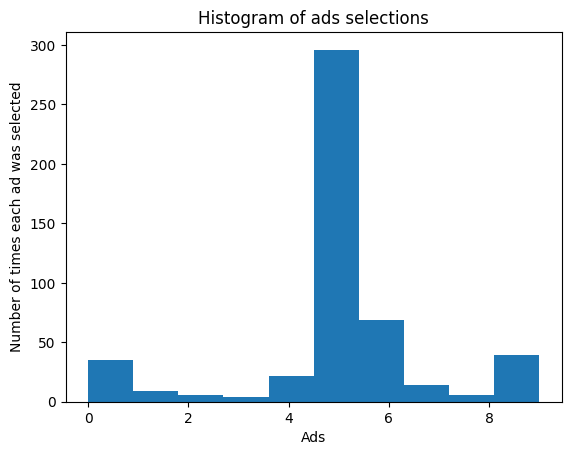

In [105]:
plt.hist(selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()